# Human Or Not Human - Modelo
## Escolha do modelo

Autor: Rafael Dadão <br>
Data: 22/05/2024 <br>
Objetivo: Construção do modelo para predição se é humano ou não

## Preprando o ambiente

In [1]:
# Carregando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from joblib import dump

## Carregando dataframe

In [2]:
# Carregando dataframe
df = pd.read_csv('df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hair_color    71 non-null     object 
 1   skin_color    71 non-null     object 
 2   specie_human  71 non-null     int64  
 3   imc           71 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


## Transformações e Manipulações

In [3]:
# Vamos aplicar o label encode para transformar as features de texto em números

# Primeiro para a cor do cabelo
le_hair = LabelEncoder()
df['c_hair_color'] = le_hair.fit_transform(df['hair_color'])

# Vamos deixar o mapeamento das cores aqui
df[['hair_color','c_hair_color']].drop_duplicates()

,hair_color,c_hair_color
0,blond,4
1,none,9
4,brown,6
5,"brown, grey",7
8,black,3
9,"auburn, white",2
16,white,10
17,grey,8
47,blonde,5
56,"auburn, grey",1


In [4]:
# Agora para cor da pele
le_skin = LabelEncoder()
df['c_skin_color'] = le_skin.fit_transform(df['skin_color'])

# Novamente, mapeamos as cores
df[['skin_color','c_skin_color']].drop_duplicates()

,skin_color,c_skin_color
0,fair,6
1,gold,8
2,"white, blue",27
3,white,26
4,light,16
7,"white, red",28
11,unknown,25
13,green,9
14,"green-tan, brown",11
17,pale,20


In [5]:
# Vamos separar nosso target das features

X = df[['c_hair_color', 'c_skin_color', 'imc']]
y = df['specie_human']

In [6]:
# Agora, vamos fazer a divisão padrão de teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Vamos aplicar a padronização para garantir que os modelos não pesem diferente as features pela escala

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preparando o modelo

- Vamos começar com um mais simples e evoluir os modelos, depois vamos tentar tunar o modelo escolhido. Vamos passar por:
1. Regressão Logística
    - identificará relações lineares
2. KNN
    - identificará similiaridade e proximidade
3. Árvore de Decisão
    - identifica subconjuntos mais homogêneos

- Depois vamos testar para modelos mais complexos:
1. Random Forest
    - identifica a moda do resultado entre vários modelos de árvore (bagging)
2. SVM
    - identifica um hiperplano que melhor separa as classes

In [8]:
# Vamos criar uma função que treino e traz a avaliação do modelo

def train_and_evaluate_model(model, model_name):
    print(f"Treinando e avaliando: {model_name}")
    
    # Treinamento do modelo
    model.fit(X_train, y_train)
    
    # Avaliação com ClassificationReport do Yellowbricks
    visualizer = ClassificationReport(model, classes=['Alienígena', 'Humano'], support=True)
    visualizer.score(X_test, y_test)
    visualizer.poof(outpath=f"{model_name}_classification_report.png") # salva as avaliações para melhor comparação
    
    # Exibir o gráfico
    plt.show()

## Regressão Logística

Treinando e avaliando: LogisticRegression


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


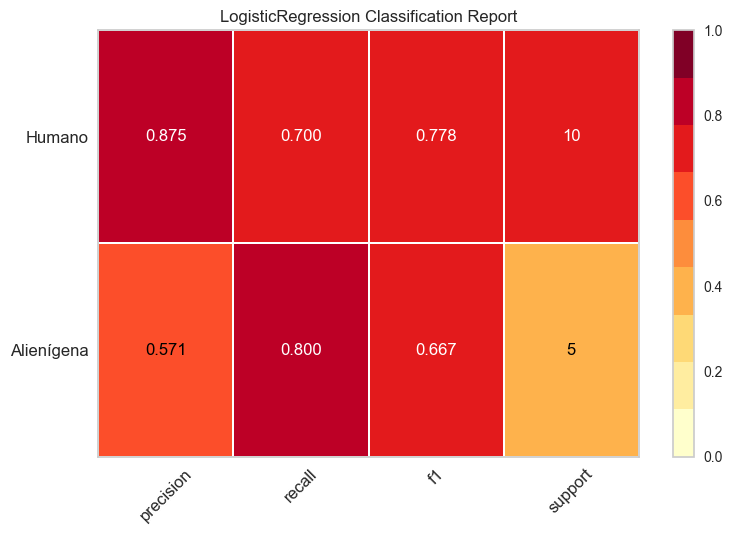

In [9]:
# Treinando e avaliando nosso modelo base
log_reg = LogisticRegression()
train_and_evaluate_model(log_reg, "LogisticRegression")

### Métricas de avaliação
1. Precision
    - Proporção de verdadeiros positivos (TP) sobre o total de positivos preditos (TP+FP)
2. Recall (sensibilidade)
    - Proporção de verdadeiros positivos (TP) sobre o total de positivos reais (TP+FN)
3. F1 Score
    - É a média harmônica entre Precision e Recall
4. Support
    - Mostra quantos exemplos verdadeiros pertencem a cada classe

Vemos que a classe dos Alien são mais difíceis de prever pelo modelo, o que faz sentido devido a variabilidade das suas características.Temos ETEzões bem diferentes no mundo de Star Wars, de um Wookiee a um Ewok.
A única métrica em que foi mais alto nos Aliens é o recall que indica menos falsos negativos. Ele acerta bem em dizer que a observação não é um Alien.

Bom, a métrica que vamos prestar mais atenção é o *F1 Score*, já que o modelo é mais para brincadeira identificando a classe pelas características. Não precisamos tomar tanto cuidado com falso negativo ou positivo e sim ter um modelo que acerta mais no geral.

Não vamos olhar para acurácia, já que é uma medida em que mostra Número de previsões corretas no total das previsões. Mas é uma medida com muitas limitações e acredito que será muito enviesada com um conjunto de dados com poucas observações assim como o que estamos analisando.

## KNN

Treinando e avaliando: KNN


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


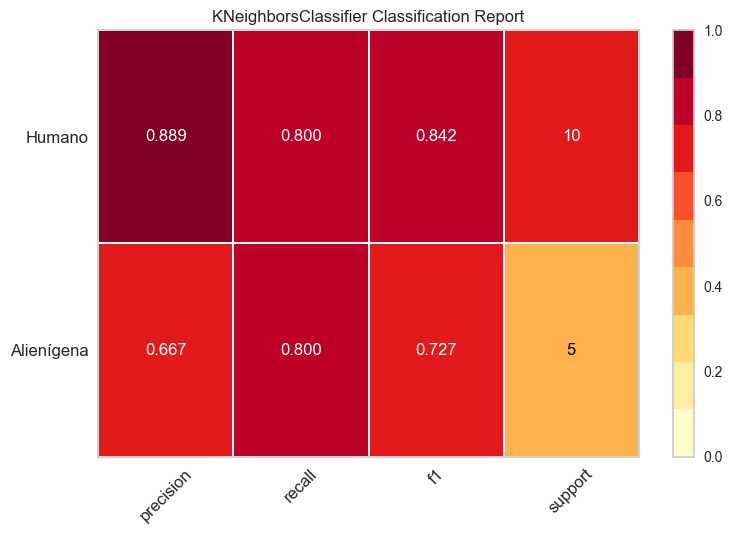

In [10]:
# Vamos utilizar o hiperparâmetro de 5 vizinhos para classificar a observação
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn, "KNN")

Conseguimos uma melhora no desempenho, não somente para aliens como até mesmo para os humanos.

## Árvore de Decisão

Treinando e avaliando: DecisionTree


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


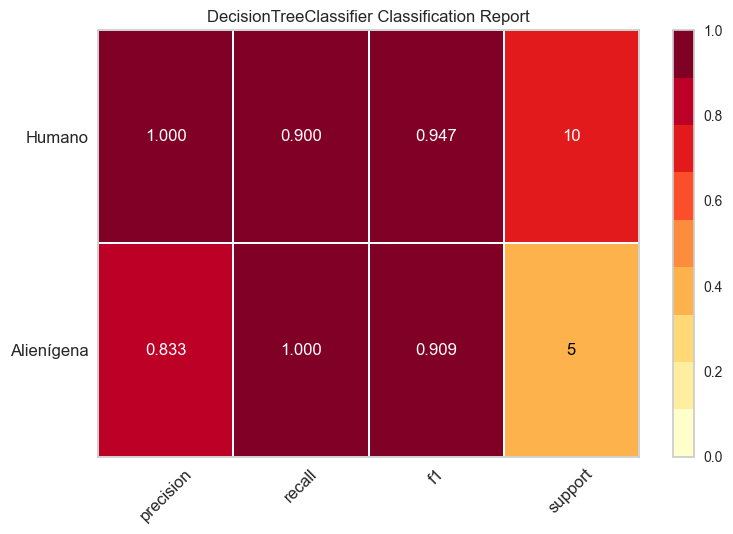

In [11]:
# Colocamos o random_state para sempre podermos reproduzir essa mesma aleatoriedade

dt = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt, "DecisionTree")

Tivemos resultados realmente muitos bons, o que chama atenção para um overfitting, provavelmente essa árvore está muito grande, entendendo inclusive o ruído dos dados, o que não vai ser bom para classificar novas entradas, o que chamamos de generalização do modelo. Talvez se aplicarmos uma poda fique melhor.

## Random Forest

Treinando e avaliando: RandomForest


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


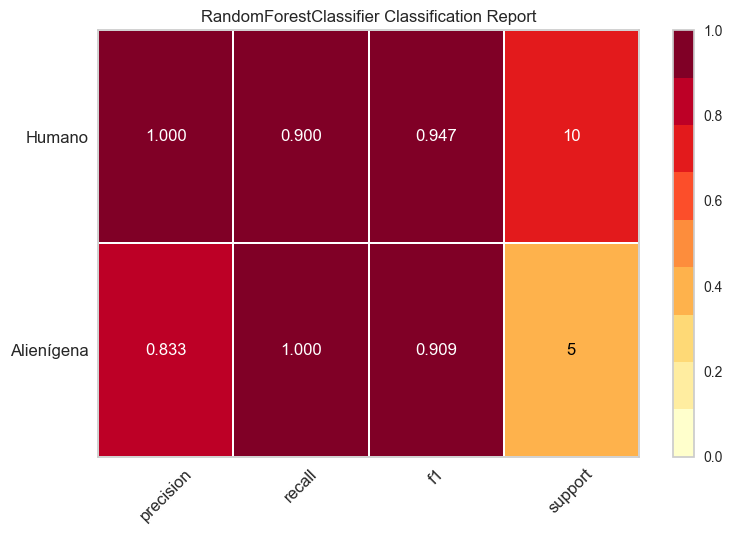

In [12]:
# Vamos utilizar o mesmo random_state da árvore de decisão

rf = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rf, "RandomForest")

Tivemos os mesmíssimos resultados de uma única arvore de decisão, o que na minha interpretação reforça a última fala sobre o modelo ter aprendido o ruído do conjunto de dados.

## SVM

Treinando e avaliando: SVM


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


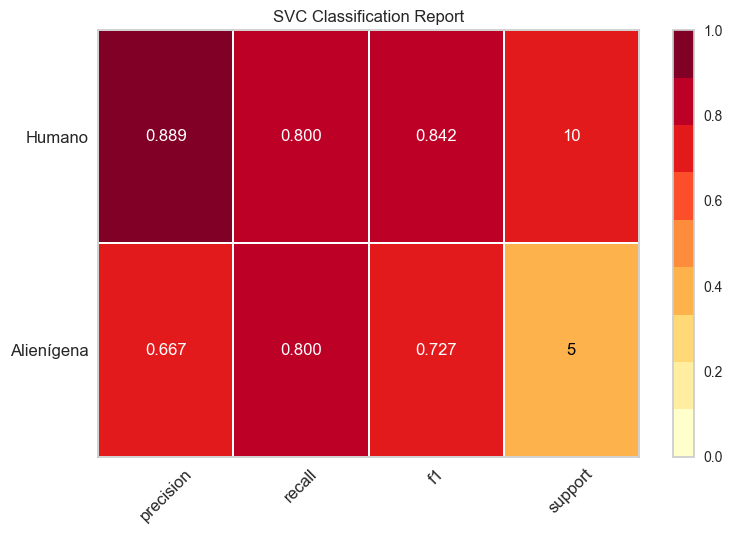

In [13]:
# Para finalizar vamos testar o SVM

svm = SVC(kernel='linear', random_state=42)
train_and_evaluate_model(svm, "SVM")

Tivemos os mesmissímos resultados que o KNN. Escolhemos utilizar o kernel mais simples, na qual tenta separar o conjunto de dados de forma linear, por uma linha em 2D, plano em 3D ou hiperplano em várias dimensões.

## Escolha do modelo

- Depois de rodarmos todos esses modelos na forma mais simples / padrão, vamos ficar com: **KNN**
- É um modelo mais simples que o SVM e podemos explorar seus resultados e tentar encontrar melhores parâmetros (tunning).


# Otimização
- Vamos tentar fazer pequenas modificações por vez para otimiza-lo.

In [14]:
# Modelo base
base_model = KNeighborsClassifier(n_neighbors=5)
base_model.fit(X_train, y_train)

KNeighborsClassifier()

## Grid Search
- Agora vamos deixar o grid search descobrir os melhores hiperparâmetros
- Vamos deixar o grid search descobrir um hiperparâmetro por vez, entre:
1. n_neighbors (Nº vizinhos)
    - Esse hiperparâmetro é a quantidade de vizinhos a ser considerado para determinar a classe da observação que está sendo avaliada.
2. weights (Pesos)
    - Muda o peso atribuído aos vizinhos:
        - uniforme: todos os vizinhos tem o mesmo peso.
        - distance: vizinhos mais próximos tem maior peso.
3. metric (Distância)
    - Altera a forma de calcular a distância:
        - Euclidiana: uma linha reta entre os pontos.
        - Mangattan: como se andasse por quarterões até alcançam o outro ponto.

Melhor n_neighbors: {'n_neighbors': 3}


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


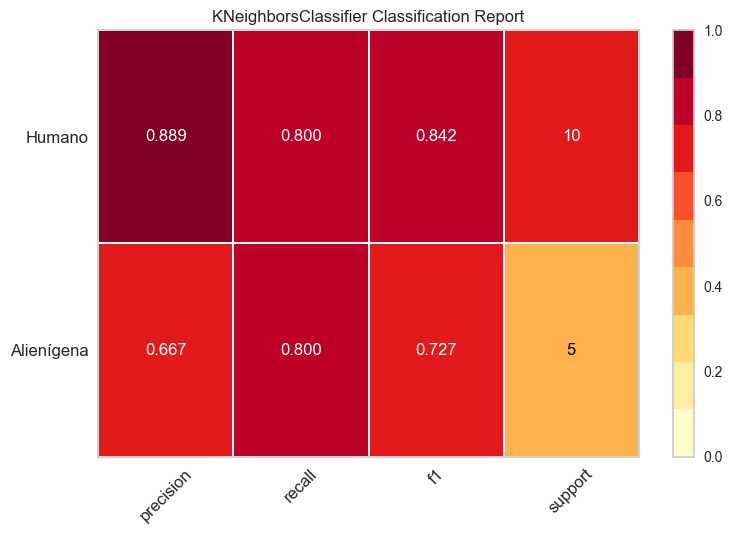

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [15]:
# Comecemos com o número de vizinhos

# Vamos testar alguns número de vizinhos incluindo o que utilizamos no modelo base (5)
param_grid_1 = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Vamos chamar esse modelo de modelo_grid_1
modelo_grid_1 = GridSearchCV(KNeighborsClassifier(), param_grid_1, cv=10, scoring='f1', n_jobs=-1)
modelo_grid_1.fit(X_train, y_train)

# Melhor modelo após a busca
best_model_1 = modelo_grid_1.best_estimator_
print("Melhor n_neighbors:", modelo_grid_1.best_params_)

# Avaliação
visualizer = ClassificationReport(best_model_1, classes=['Alienígena', 'Humano'], support=True)
visualizer.score(X_test, y_test)
visualizer.show()

O resultado foi exatamente o mesmo do modelo base, porém o melhor número de vizinhos ficou como o 3.<br>
Vamos utilizar esse valor já que 3 deve ser menos computacionalmente pesado do que 5 e temos o mesmo resultado.<br>
Mesmo que o modelo não esteja nada pesado para seu treinamento.

Melhor weights: {'weights': 'uniform'}


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


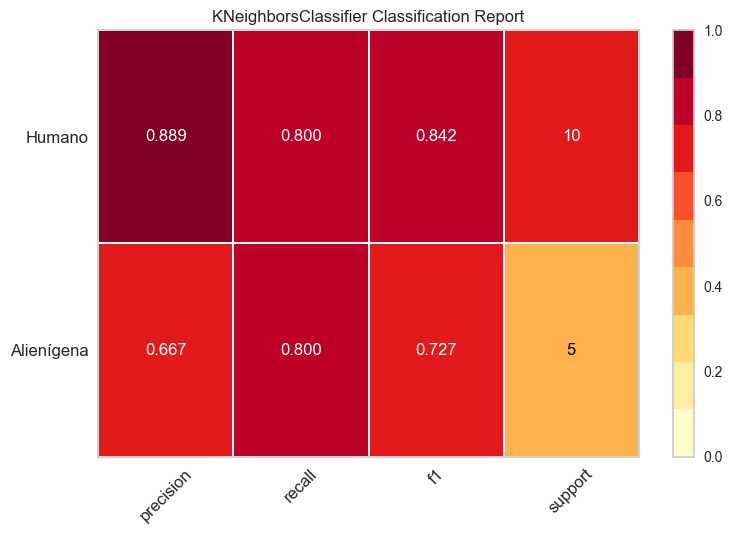

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [16]:
# Agora vamos definir os pesos
param_grid_2 = {'weights': ['uniform', 'distance']}

modelo_grid_2 = GridSearchCV(best_model_1, param_grid_2, cv=10, scoring='f1', n_jobs=-1)
modelo_grid_2.fit(X_train, y_train)

# Melhor modelo após a busca
best_model_2 = modelo_grid_2.best_estimator_
print("Melhor weights:", modelo_grid_2.best_params_)

# Avaliação
visualizer = ClassificationReport(best_model_2, classes=['Alienígena', 'Humano'], support=True)
visualizer.score(X_test, y_test)
visualizer.show()

Continuamos com os mesmíssimos resultados ainda. Vamos manter o padrão, uniform.

Melhor weights: {'metric': 'euclidean'}


c:\Users\dadao\miniconda3\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


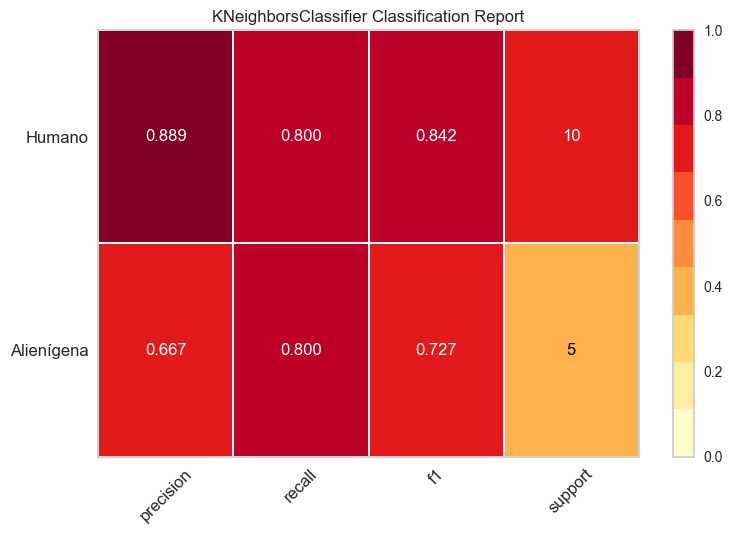

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [17]:
# Agora vamos definir os pesos
param_grid_3 = {'metric': ['euclidean', 'manhattan']}

modelo_grid_3 = GridSearchCV(best_model_2, param_grid_3, cv=10, scoring='f1', n_jobs=-1)
modelo_grid_3.fit(X_train, y_train)

# Melhor modelo após a busca
best_model_3 = modelo_grid_3.best_estimator_
print("Melhor weights:", modelo_grid_3.best_params_)

# Avaliação
visualizer = ClassificationReport(best_model_3, classes=['Alienígena', 'Humano'], support=True)
visualizer.score(X_test, y_test)
visualizer.show()

O resultado continua o mesmo. O que indica que não conseguimos otimizar o modelo por meio desses hiperparâmetros.<br>
Poderiamos utilizar outros e ficar tentando melhores resultado, mas não vamos perder muito tempo com isso nesse projeto, já que não é algo em que o resultado precisa ser o melhor possível.<br>
Sabemos que o modelo está prevendo bem as características dos humanos, sua dificuldade está em acertar os alienígenas.

# Salvando o Modelo

In [18]:
# Treinando o modelo final
model_final = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean') 
# Não precisavamos colocar os valores de weights e metric, pois são o default
model_final.fit(X_train, y_train)

# Salvando o modelo em um arquivo para ser chamado no R
dump(model_final, 'knn_model.joblib')

# Vamos salvar o scaler para carrega-lo no R
dump(scaler, 'scaler.joblib')

['scaler.joblib']

# Melhoria
O label encode não é a melhor abordagem, temos muitas opções para cor do cabelo e da pele.<br>
Poderíamos apenas deixar as opções com frequentes e colocar as demais em um categoria outros.<br>
A partir daí transformamos essas categorias em One hot encoding, com features dummy.<br>
Minha dúvida é, será que precisaríamos fazer as mais frequentes para cada classe?<br>
Modelos lineares são os que mais se beneficiariam com essa estrutura.